In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from keras.wrappers.scikit_learn import KerasClassifier

import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

%matplotlib inline

In [3]:
forests = pd.read_csv('../input/covertype/covtype.data', header=None)
col_names = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2',
             'Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3',
             'Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
             'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15',
             'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21',
             'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27',
             'Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
             'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39',
             'Soil_Type40','Cover_Type']

In [4]:
forests.columns = col_names
forests.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
forests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [11]:
forests.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
 forests.shape

(581012, 55)

In [15]:
num_var = forests[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points', 'Cover_Type']]

In [16]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points', ylabel='Density'>

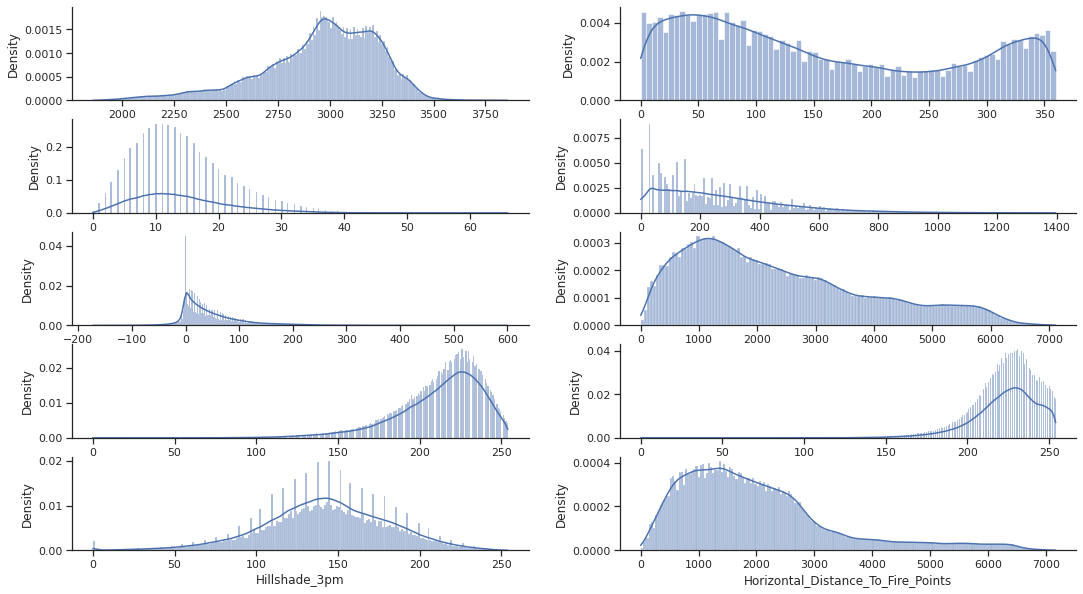

In [17]:
plt.figure(figsize=(18,10))
plt.subplot(5,2,1)
sns.histplot(forests, x='Elevation', kde=True, stat="density")
plt.subplot(5,2,2)
sns.histplot(forests, x='Aspect', kde=True, stat="density")
plt.subplot(5,2,3)
sns.histplot(forests, x='Slope', kde=True, stat="density")
plt.subplot(5,2,4)
sns.histplot(forests, x='Horizontal_Distance_To_Hydrology', kde=True, stat="density")
plt.subplot(5,2,5)
sns.histplot(forests, x='Vertical_Distance_To_Hydrology', kde=True, stat="density")
plt.subplot(5,2,6)
sns.histplot(forests, x='Horizontal_Distance_To_Roadways', kde=True, stat="density")
plt.subplot(5,2,7)
sns.histplot(forests, x='Hillshade_9am', kde=True, stat="density")
plt.subplot(5,2,8)
sns.histplot(forests, x='Hillshade_Noon', kde=True, stat="density")
plt.subplot(5,2,9)
sns.histplot(forests, x='Hillshade_3pm', kde=True, stat="density")
plt.subplot(5,2,10)
sns.histplot(forests, x='Horizontal_Distance_To_Fire_Points', kde=True, stat="density")

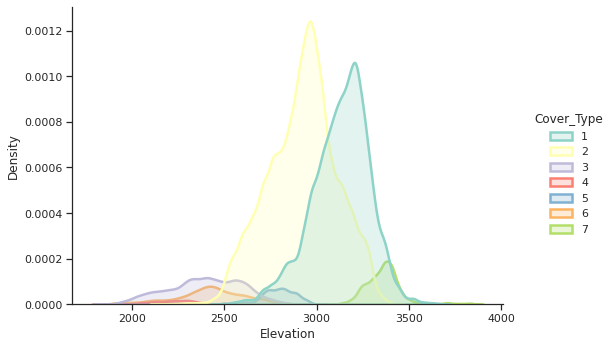

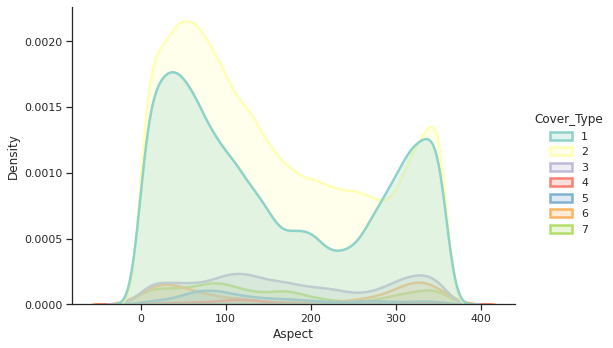

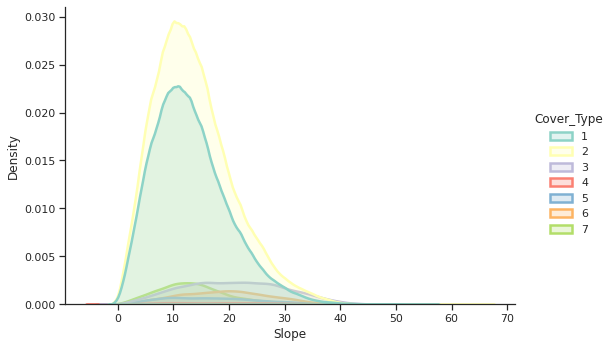

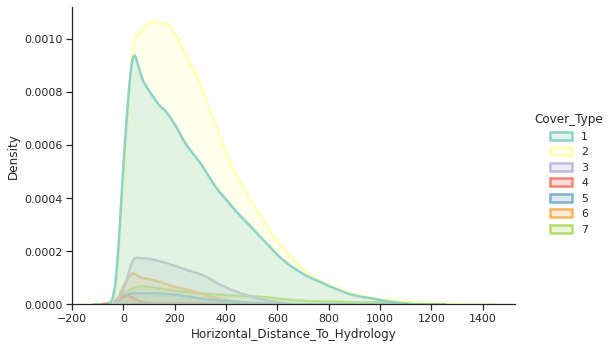

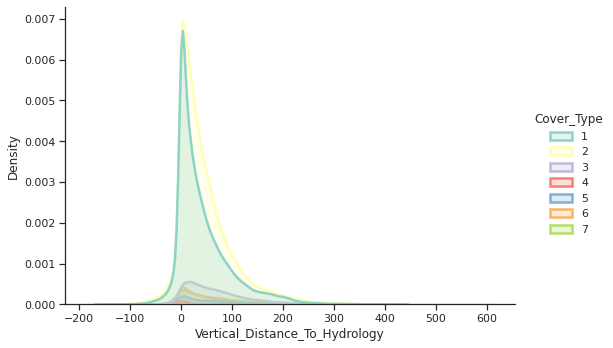

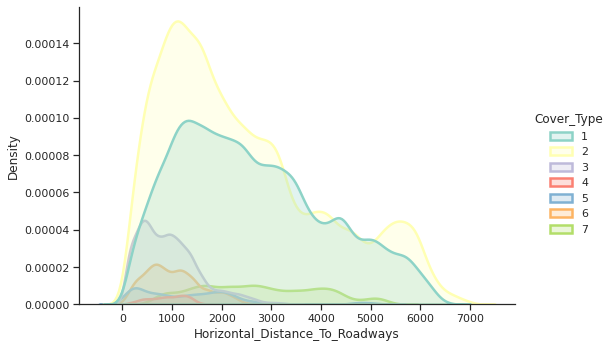

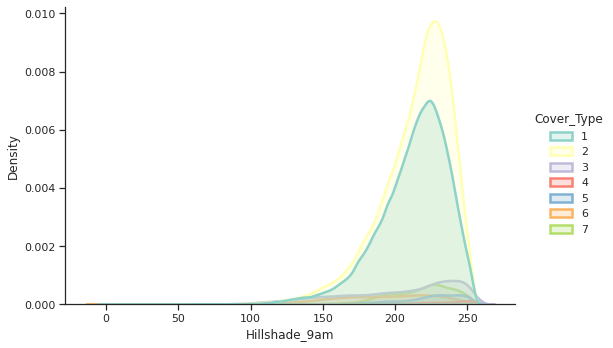

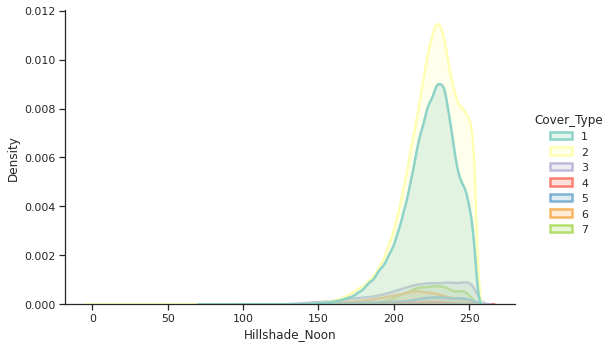

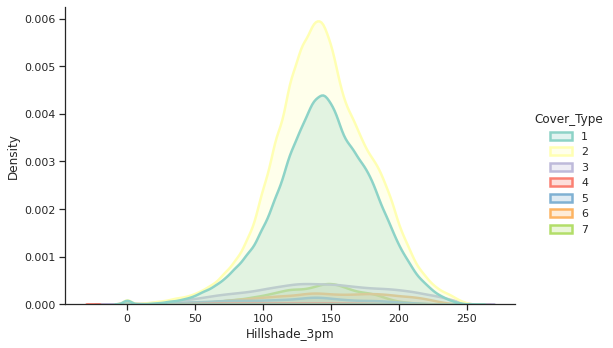

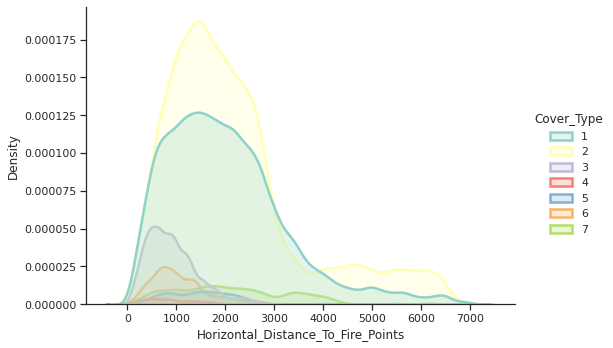

In [18]:
for col in num_var.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']:
    sns.displot(data=num_var, x=col, hue='Cover_Type', kind='kde', fill=True,
                palette=sns.color_palette('Set3', 7), height=5, aspect=1.5, linewidth=2.5)

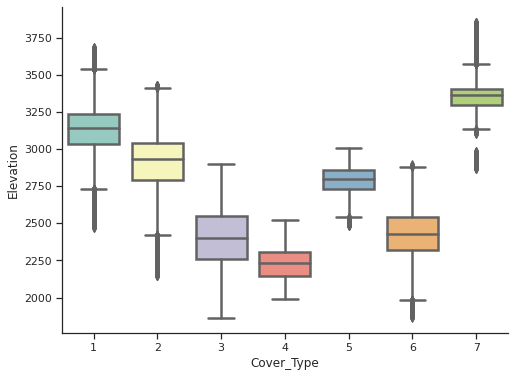

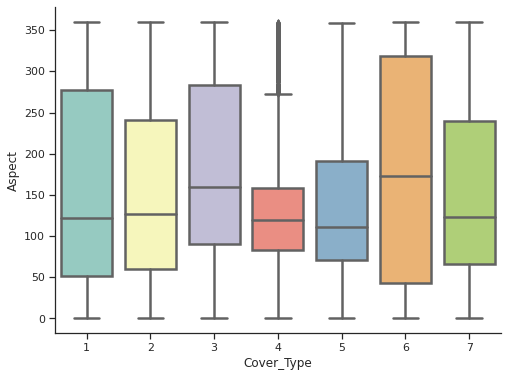

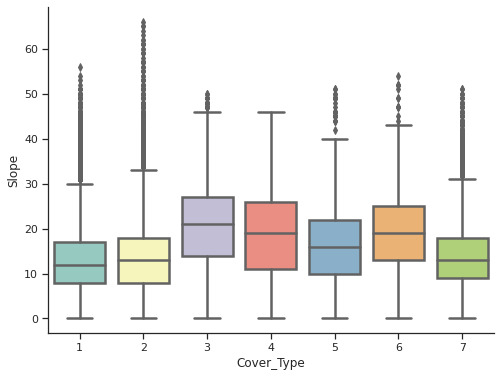

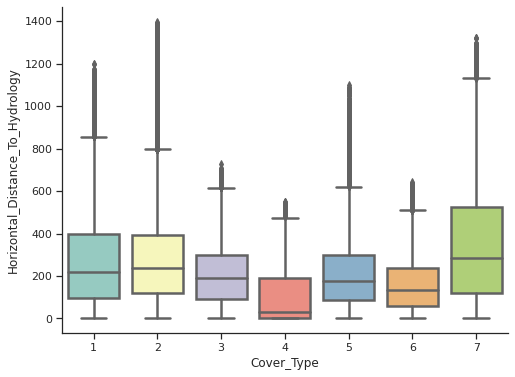

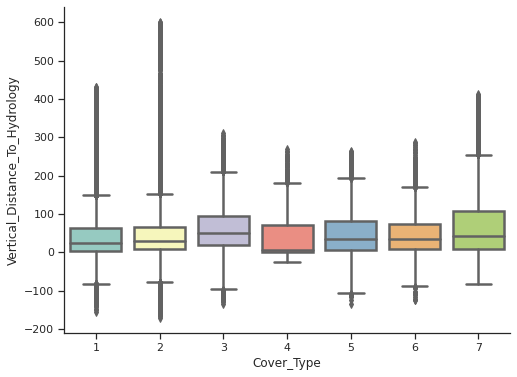

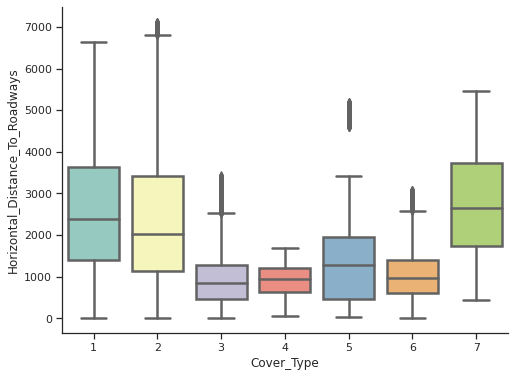

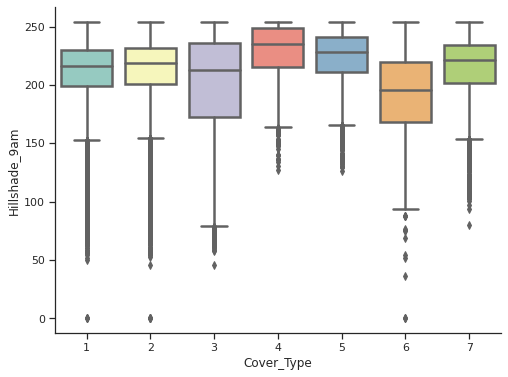

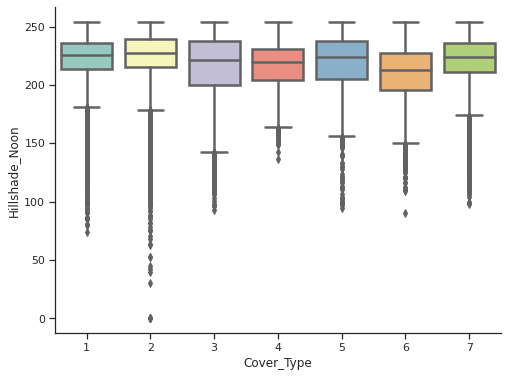

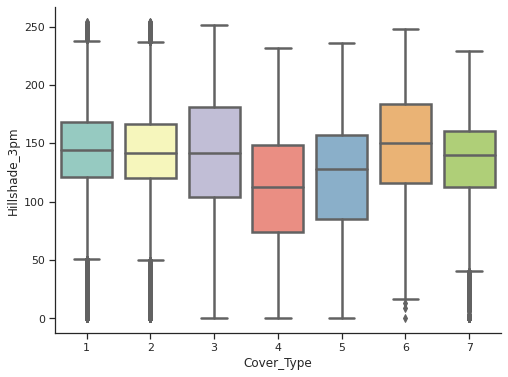

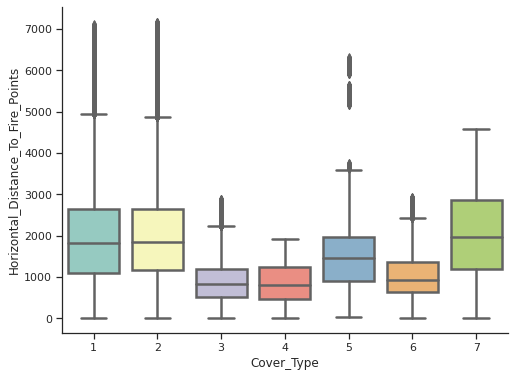

In [19]:
for i, col in enumerate(num_var.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points'].columns):
    plt.figure(i,figsize=(8,6))
    sns.boxplot(x='Cover_Type', y=col, data=forests, palette="Set3", linewidth=2.5)

In [20]:
labels=['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

Text(0.5, 0, '')

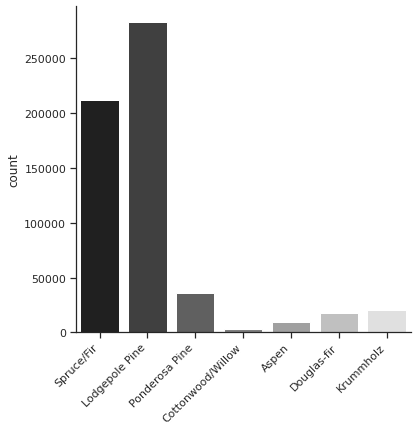

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(data=forests, x='Cover_Type', palette = 'gray').set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')

In [22]:
wilderness_areas = forests.drop(columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points','Soil_Type1','Soil_Type2','Soil_Type3',
             'Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
             'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15',
             'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21',
             'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27',
             'Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
             'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39',
             'Soil_Type40'])

In [23]:
res = wilderness_areas.groupby(['Cover_Type']).mean()
res = res.T
res.index = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']

<Figure size 576x576 with 0 Axes>

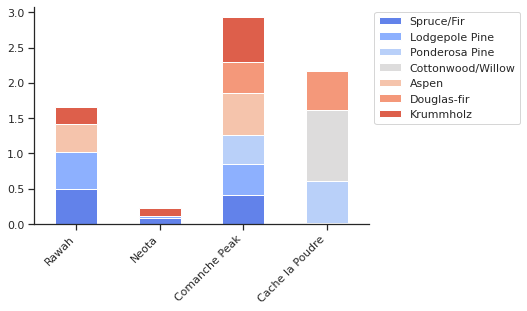

In [24]:
plt.figure(figsize=(8,8))
res.plot(kind='bar', stacked=True, color=sns.color_palette('coolwarm', 7))
plt.xticks(rotation=45, ha='right')
plt.legend(labels=labels, bbox_to_anchor=(1,1))

<AxesSubplot:>

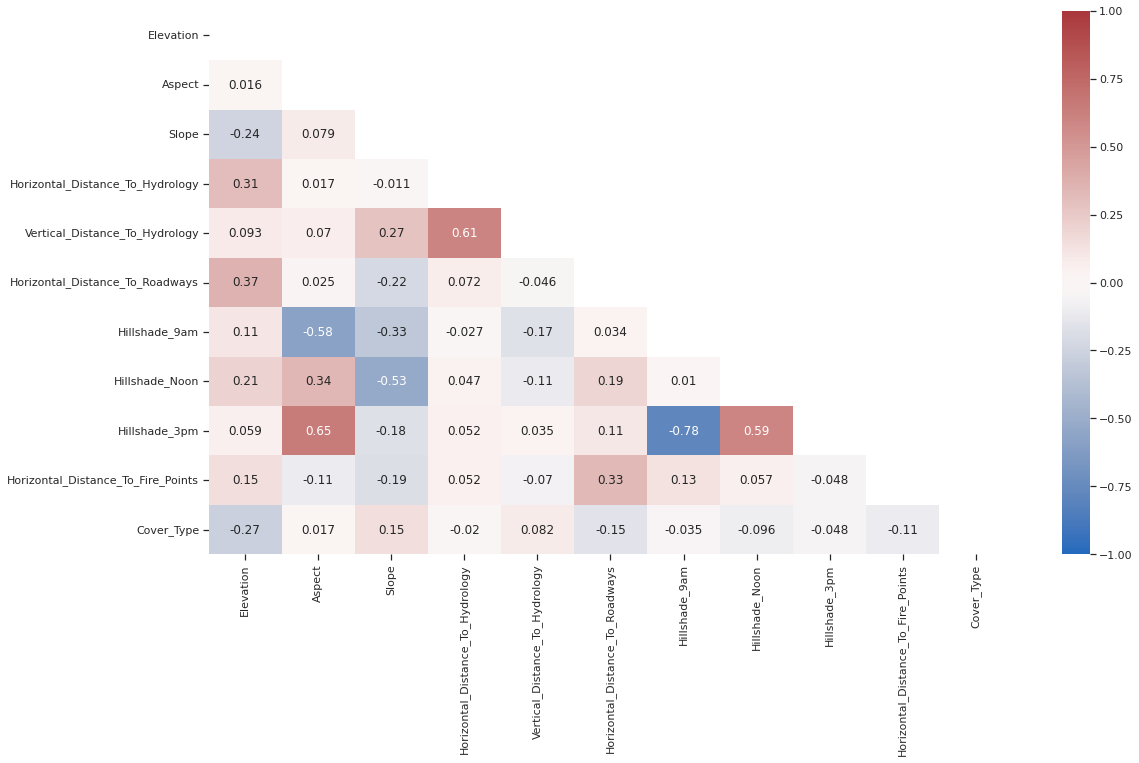

In [25]:
plt.figure(figsize=(18,10))
sns.heatmap(num_var.corr(), vmin=-1, vmax=1, annot=True,
            mask=np.triu(num_var.corr()), cmap=sns.color_palette("vlag", as_cmap=True))

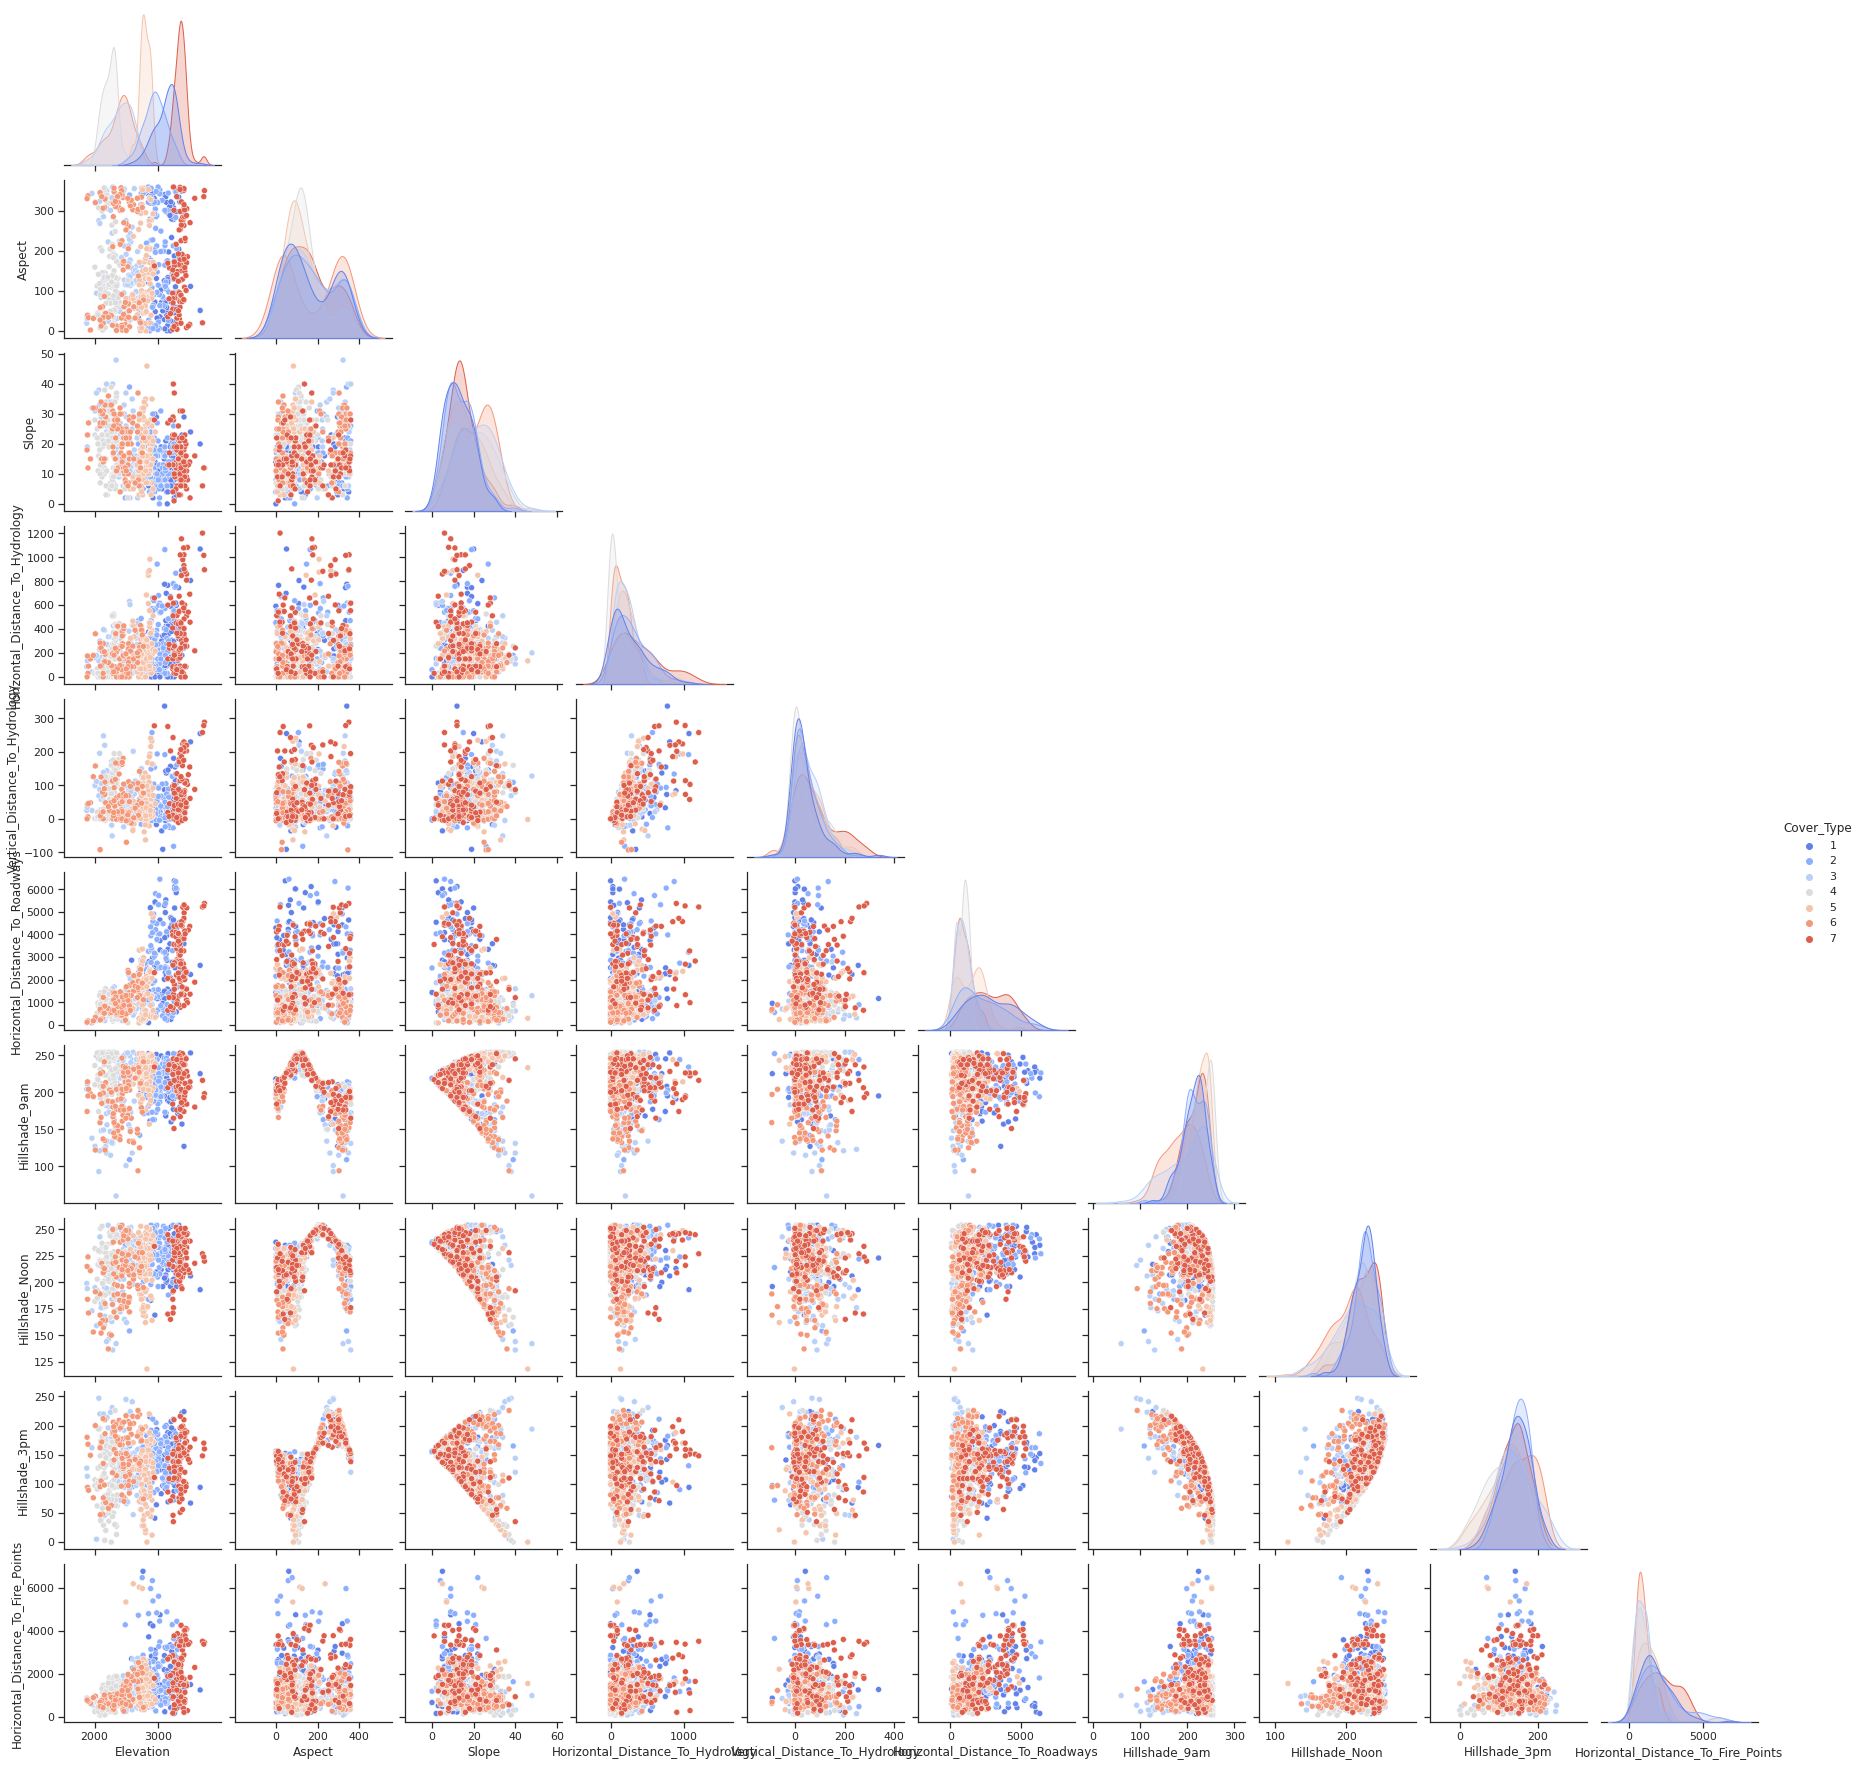

In [26]:
res = []
for i in range(1,8):
    res.append(num_var[num_var['Cover_Type'] == i].sample(n=100, random_state=42))
sub_forests = pd.concat(res)

sns.pairplot(sub_forests, corner=True, hue='Cover_Type', palette=sns.color_palette("coolwarm", 7))

In [27]:
for col in forests.columns:
    print(f"Le total de valeurs uniques dans {col} est {len(forests[col].unique())}")

Le total de valeurs uniques dans Elevation est 1978
Le total de valeurs uniques dans Aspect est 361
Le total de valeurs uniques dans Slope est 67
Le total de valeurs uniques dans Horizontal_Distance_To_Hydrology est 551
Le total de valeurs uniques dans Vertical_Distance_To_Hydrology est 700
Le total de valeurs uniques dans Horizontal_Distance_To_Roadways est 5785
Le total de valeurs uniques dans Hillshade_9am est 207
Le total de valeurs uniques dans Hillshade_Noon est 185
Le total de valeurs uniques dans Hillshade_3pm est 255
Le total de valeurs uniques dans Horizontal_Distance_To_Fire_Points est 5827
Le total de valeurs uniques dans Wilderness_Area1 est 2
Le total de valeurs uniques dans Wilderness_Area2 est 2
Le total de valeurs uniques dans Wilderness_Area3 est 2
Le total de valeurs uniques dans Wilderness_Area4 est 2
Le total de valeurs uniques dans Soil_Type1 est 2
Le total de valeurs uniques dans Soil_Type2 est 2
Le total de valeurs uniques dans Soil_Type3 est 2
Le total de valeu

In [7]:
def pipeline(model):
    num_features_robust = ['Aspect']
    num_features_standard = ['Elevation', 'Slope','Horizontal_Distance_To_Hydrology',
                      'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am',
                      'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
    numeric_transformer  = Pipeline(steps=[
                         ('robust_scaler', RobustScaler()),
                         ('standard_scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
      transformers=[
                 ('num1', numeric_transformer, num_features_robust),
                 ('num2', numeric_transformer, num_features_standard)])
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    return pipe

In [6]:
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    model_acc = balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy ({}): {:.2f}%".format(model_name, model_acc * 100))
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    

In [8]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring=make_scorer(balanced_accuracy_score))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [9]:
def randomized_search_cv(model, param_grid, cross_val, X_train, y_train):
    clf = RandomizedSearchCV(model, param_grid, cv=cross_val, n_jobs=-1,
                             scoring=make_scorer(balanced_accuracy_score),
                             n_iter=5, verbose=1)
    clf.fit(X_train, y_train)
    return clf

In [10]:
X = forests.drop(columns=['Cover_Type'])
y = forests['Cover_Type'] - 1 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(387341, 54) (193671, 54) (387341,) (193671,)


# **Modélisation**

In [13]:
kfold = KFold(n_splits=5)

# **Logistic Regression**

In [30]:
param_grid_lr = {
    'classifier__penalty' : ['l1','l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver': ['newton-cg','sag', 'saga']
}

In [32]:
#clf_lr = randomized_search_cv(pipeline(LogisticRegression(tol=1e-2,
 #                                                        class_weight='balanced',  max_iter=200,
  #                                                       multi_class='multinomial', random_state=42)),
   #                           param_grid_lr, kfold ,X_train, y_train)

In [33]:
#lr = clf_lr.best_estimator_
#lr

In [34]:
lr = pipeline(LogisticRegression(C=0.012742749857031334,
                                    class_weight='balanced', max_iter=200,
                                    multi_class='multinomial', random_state=42,
                                    solver='saga', tol=0.01))
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Aspect']),
                                                 ('num2',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Elevation', 'Slope',
                               

Balanced accuracy (LogisticRegression): 64.17%


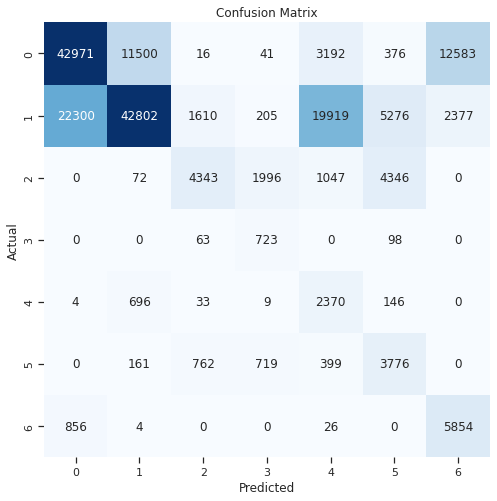

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.65      0.61      0.63     70679
           1       0.77      0.45      0.57     94489
           2       0.64      0.37      0.47     11804
           3       0.20      0.82      0.32       884
           4       0.09      0.73      0.16      3258
           5       0.27      0.65      0.38      5817
           6       0.28      0.87      0.42      6740

    accuracy                           0.53    193671
   macro avg       0.41      0.64      0.42    193671
weighted avg       0.67      0.53      0.57    193671



In [35]:
evaluate_model(lr,'LogisticRegression', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

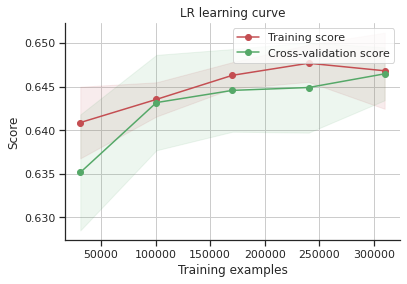

In [36]:
# Logistic Regression - Learning Curve 
plot_learning_curve(estimator=lr,title="LR learning curve",
                    X=X_train, y=y_train, cv=kfold)

In [37]:
f1_score(y_test, lr.predict(X_test), average='weighted')

0.5669172374271277

In [38]:
balanced_accuracy_score(y_test, lr.predict(X_test))

0.6416964930605271

# **K-Nearest Neighbors**

In [39]:
param_grid_neigh = {
             'classifier__n_neighbors': np.arange(1, 25),
             'classifier__metric':['euclidean', 'manhattan']
}

In [ ]:
#clf_neigh = randomized_search_cv(pipeline(KNeighborsClassifier(weights='distance')), param_grid_neigh, kfold ,X_train, y_train)

In [ ]:
#neigh = clf_neigh.best_estimator_
#neigh

In [40]:
neigh = pipeline(KNeighborsClassifier(metric='manhattan', n_neighbors=2,
                                      weights='distance'))
neigh.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Aspect']),
                                                 ('num2',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Elevation', 'Slope',
                               

Balanced accuracy (KNeighborsClassifier): 83.65%


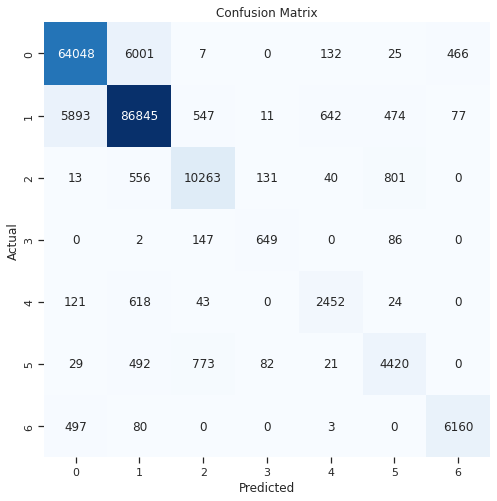

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     70679
           1       0.92      0.92      0.92     94489
           2       0.87      0.87      0.87     11804
           3       0.74      0.73      0.74       884
           4       0.75      0.75      0.75      3258
           5       0.76      0.76      0.76      5817
           6       0.92      0.91      0.92      6740

    accuracy                           0.90    193671
   macro avg       0.84      0.84      0.84    193671
weighted avg       0.90      0.90      0.90    193671



In [41]:
evaluate_model(neigh,'KNeighborsClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

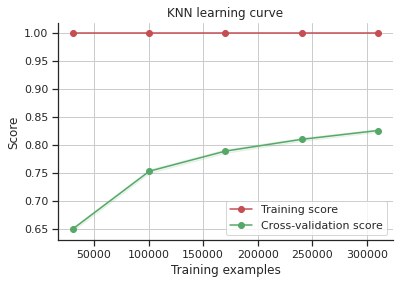

In [42]:
# K-Nearest Neighbors - Learning Curve 
plot_learning_curve(estimator=neigh,title="KNN learning curve",
                    X=X_train, y=y_train, cv=kfold)

In [43]:
f1_score(y_test, neigh.predict(X_test), average='weighted')

0.9027612804450131

In [44]:
balanced_accuracy_score(y_test, neigh.predict(X_test))

0.8364706407352079

# **Random Forest**

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12, 15, 18, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [46]:
# Create the random grid
random_grid = {
               'classifier__n_estimators': n_estimators,
               'classifier__max_features':max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap
}

In [ ]:
#clf_rf = randomized_search_cv(pipeline(RandomForestClassifier(class_weight='balanced',
 #                                                            random_state=42)), random_grid, kfold ,X_train, y_train)

In [ ]:
#rf = clf_rf.best_estimator_
#rf

In [14]:
rf = pipeline(RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        max_features='sqrt', min_samples_leaf=2,
                                        n_estimators=500, random_state=42))
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Aspect']),
                                                 ('num2',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Elevation', 'Slope',
                               

Balanced accuracy (RandomForestClassifier): 92.18%


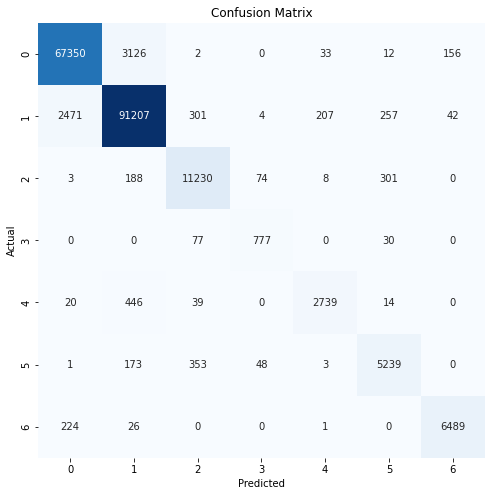

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     70679
           1       0.96      0.97      0.96     94489
           2       0.94      0.95      0.94     11804
           3       0.86      0.88      0.87       884
           4       0.92      0.84      0.88      3258
           5       0.90      0.90      0.90      5817
           6       0.97      0.96      0.97      6740

    accuracy                           0.96    193671
   macro avg       0.93      0.92      0.92    193671
weighted avg       0.96      0.96      0.96    193671



In [15]:
evaluate_model(rf,'RandomForestClassifier', X_test, y_test)

In [52]:
#rf_importances = rf.named_steps['classifier'].feature_importances_
#sorted_indices = np.argsort(rf_importances)[::-1]
#plt.title('Feature Importance')
#plt.bar(range(X_train.shape[1]), rf_importances[sorted_indices], align='center')
#plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
#plt.tight_layout()
#plt.show()

In [ ]:
# Random Forest - Learning Curve 
plot_learning_curve(estimator=rf,title="RF learning curve",
                    X=X_train, y=y_train, cv=kfold)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [16]:
f1_score(y_test, rf.predict(X_test), average='weighted')

0.9553424894329166

In [17]:
balanced_accuracy_score(y_test, rf.predict(X_test))

0.9217989637862145

# **XGBoost Classifier**

In [36]:
param_grid_xbg = {
    'classifier__max_depth':np.arange(2, 10),
    #'classifier__subsamples':np.arange(0.1, 1, 0.1),
    #'classifier__n_estimators':np.arange(100, 500, 100),
    'classifier__learning_rate':np.arange(0.01, 0.1, 0.01)
}

In [38]:
#clf_xgb = randomized_search_cv(pipeline(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
 #                                                        random_state=42)),
  #                            param_grid_xbg, kfold ,X_train, y_train)

In [39]:
#best_xbg = clf_xgb.best_estimator_
#best_xbg

In [18]:
best_xbg = pipeline(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                                         random_state=42))
best_xbg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Aspect']),
                                                 ('num2',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Elevation', 'Slope',
                               

Balanced accuracy (XGBoostClassifier): 78.72%


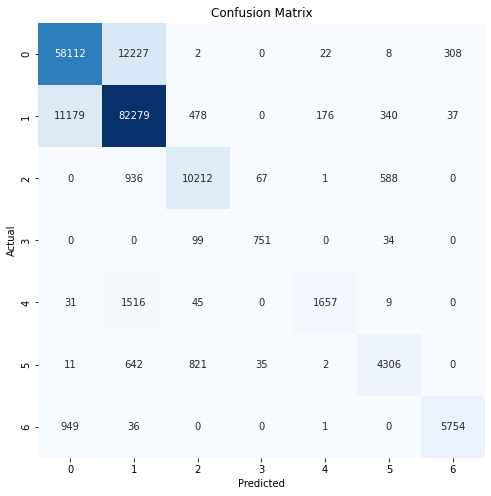

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.82      0.82     70679
           1       0.84      0.87      0.86     94489
           2       0.88      0.87      0.87     11804
           3       0.88      0.85      0.86       884
           4       0.89      0.51      0.65      3258
           5       0.81      0.74      0.78      5817
           6       0.94      0.85      0.90      6740

    accuracy                           0.84    193671
   macro avg       0.87      0.79      0.82    193671
weighted avg       0.84      0.84      0.84    193671



In [19]:
evaluate_model(best_xbg,'XGBoostClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

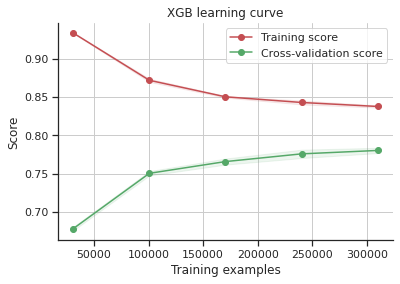

In [42]:
# XGBoost - Learning Curve 
plot_learning_curve(estimator=best_xbg,title="XGB learning curve",
                    X=X_train, y=y_train, cv=kfold)

In [51]:
mean_squared_error(y_test, best_xbg.predict(X_test), squared=False)

0.7788756996895686

In [49]:
mean_absolute_error(y_test, best_xbg.predict(X_test))

0.24101698240831101

In [45]:
f1_score(y_test, best_xbg.predict(X_test), average='weighted')

0.8411737934285158

## **Artificial Neural Network**

In [67]:
y_ann = to_categorical(y)
y_test_ann = to_categorical(y_test)

In [53]:
def create_model(optimizer='adam', kernel_initializer='glorot_uniform'):
    model = Sequential()
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=128, activation='relu'))
    #model.add(Dropout(rate=0.5))
    #model.add(Dense(units=7, activation='relu'))
    #model.add(Dropout(rate=0.5))
    model.add(Dense(units=y.shape[1], activation='softmax', input_dim=X.shape[1]) )

    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [55]:
model = Sequential(
    [
        Dense(units=54, kernel_initializer='he_uniform',activation='relu'),
        Dense(units=34, kernel_initializer='he_uniform',activation='relu'),
        Dense(units=y_ann.shape[1], activation='softmax', input_dim=X.shape[1]) 
    ]
)

Epoch 1/10
15434/15434 [==============================] - 39s 2ms/step - loss: 21.9372 - categorical_accuracy: 0.5431 - val_loss: 2.8542 - val_categorical_accuracy: 0.4243
Epoch 2/10
15434/15434 [==============================] - 39s 2ms/step - loss: 1.2778 - categorical_accuracy: 0.6204 - val_loss: 1.8282 - val_categorical_accuracy: 0.5207
Epoch 3/10
15434/15434 [==============================] - 38s 2ms/step - loss: 1.0588 - categorical_accuracy: 0.6439 - val_loss: 1.5924 - val_categorical_accuracy: 0.5796
Epoch 4/10
15434/15434 [==============================] - 38s 2ms/step - loss: 0.9725 - categorical_accuracy: 0.6572 - val_loss: 1.3482 - val_categorical_accuracy: 0.5552
Epoch 5/10
15434/15434 [==============================] - 37s 2ms/step - loss: 0.9372 - categorical_accuracy: 0.6645 - val_loss: 1.4077 - val_categorical_accuracy: 0.6019
Epoch 6/10
15434/15434 [==============================] - 37s 2ms/step - loss: 0.9147 - categorical_accuracy: 0.6695 - val_loss: 1.7005 - val_ca

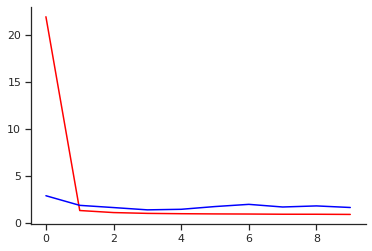

In [56]:
es = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
h=model.fit(X, y_ann, verbose=1, epochs=10, validation_split=0.15)
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='blue')

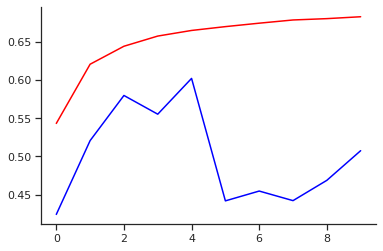

In [57]:
plt.plot(h.history['categorical_accuracy'], color='red')
plt.plot(h.history['val_categorical_accuracy'], color='blue')

In [68]:
y_test_arg=np.argmax(y_test_ann,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)

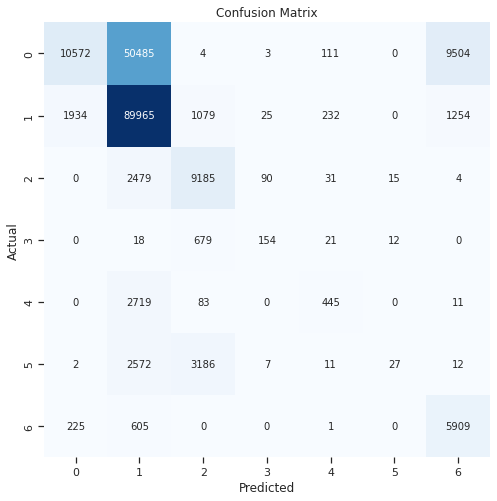

In [69]:
cm = confusion_matrix(y_test_arg, Y_pred)
clr = classification_report(y_test_arg, Y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [70]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.15      0.25     70679
           1       0.60      0.95      0.74     94489
           2       0.65      0.78      0.71     11804
           3       0.55      0.17      0.26       884
           4       0.52      0.14      0.22      3258
           5       0.50      0.00      0.01      5817
           6       0.35      0.88      0.50      6740

    accuracy                           0.60    193671
   macro avg       0.57      0.44      0.38    193671
weighted avg       0.68      0.60      0.52    193671

